# SérieBeta : Correction 
  ## Exercice 1: Biais

Soit $X_1, \ldots, X_n$ un échantillon de taille $n$ de réalisations indépendantes
issues d'une distribution de Bernoulli avec paramètre $p$.

On propose l'estimateur suivant $\widehat{p}_n$ pour $p$:

\begin{gather*}
\widehat{p}_n = \frac{1 + \sum_{i=1}^n X_i}{2 + n}
\end{gather*}

**Question:** Quel est le biais de l'estimateur lorsque $n \to \infty$ ? Écrivez la valeur numérique (approximative à l'ordre $10^{-2}$) dans la variable `biais`.



**Solution analytique**: On peut calculer le biais par la formule
\begin{gather*}
\operatorname{biais}(\widehat{p}_n) = \mathbb{E}\left[\widehat{p}_n - p\right]
\end{gather*}
pour laquelle on trouve, via la linéarité de l'espérance,

\begin{align*}
\mathbb{E}\left[\widehat{p}_n\right] &= \frac{1}{2+n} \left(1 + \sum_{i=1}^n \mathbb{E}[X_i]\right) \\
&= \frac{1}{2+n} \left(1 + np\right) \\
&= \frac{1}{2+n} + \frac{n}{2+n} p
\end{align*}


Puisque l'expression ci-dessus tend vers $p$ lorsque $n \to \infty$, le biais aussi tend vers $0$ lorsque $n \to \infty$.

*Note: L'estimateur proposé est utilisé pour éviter une estimation de $\widehat{p} = 0$ ou $1$ exactement, ce qui arrive lorsqu'on utilise l'estimateur du maximum de vraisemblance. Voir aussi le lissage de Laplace (https://en.wikipedia.org/wiki/Rule_of_succession)*.



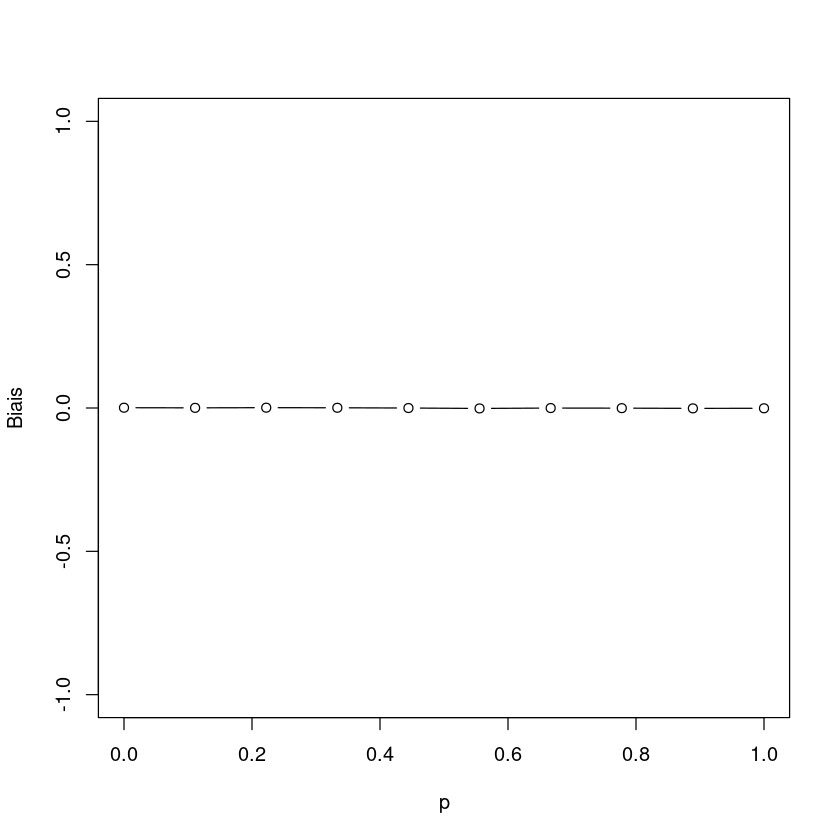

In [ ]:
########### Solution R: ##########


n_tirages <- 100
n <- 1000
valeurs_p <- seq(0,1,length.out=10)
biais <- numeric(10)

for (i in 1:10) {
  p <- valeurs_p[i]
  estim <- numeric(n_tirages)
  for (j in 1:n_tirages) {
    tirages <- rbinom(n, size = 1, prob = p)
    estim[j] <- (1+sum(tirages))/(2+n)
  }
  biais[i] <- mean(estim - p)
}

plot(valeurs_p, biais, ylim = c(-1, 1), xlab = "p", ylab = "Biais",type='b')

## Exercice 2: Temps de déboguage

Une erreur se tapit dans le code de votre projet de bachelor. Chaque membre $i$ de votre équipe de trois étudiants ($i \in \{1, 2, 3\}$) a besoin de $T_i$ heures pour trouver le bug. On suppose que les temps $T_i$ ont des distributions exponentielles avec paramètres $\lambda_1 = 0.1$, $\lambda_2 = 0.35$, $\lambda_3 = 0.06$ respectivement.

Un seul membre de votre équipe est choisi au hasard avec probabilités égales pour trouver le bug.

**Question**: Dans cette situation, avec quelle probabilité est-ce que le bug sera trouvé en moins de 12h? Stockez la valeur dans la variable `p`.



**Solution analytique**: Soit $A = \left\{ \text{le bug est trouvé en moins de 12h }\right\}$. On décompose cet événement selon le choix $C \in \left\{1,2,3\right\}$ du membre de l'équipe:

\begin{align*}
P(A) &= \sum_{i=1}^3 P(A \mid C = i) P(C = i)  \\
&= \frac{1}{3} \sum_{i=1}^3 P(T_i \leqslant 12) \\
&= \frac{1}{3} \left( 1 - e^{-0.1 \times 12} + 1 - e^{-0.35 \times 12} + 1 - e^{-0.06 \times 12} \right) \\
&\approx \frac{1}{3} (3 - 0.803) \approx 0.732
\end{align*}




In [ ]:
########### Solution R: ##########


n <- 10000
tirages <- replicate(n, rexp(3, rate = c(0.1, 0.35, 0.06)))
coords <- sample(1:3, size = n, replace = TRUE)
choisi <- tirages[cbind(coords, 1:ncol(tirages))]
p <- mean(choisi < 12)

## Exercice 3: Expérience répétée

Un chercheur souhaite à tout prix démontrer par une expérience un phénomène dont il est convaincu de l'existence. Si le phénomène existe, on suppose que l'expérience le fait apparaitre avec probabilité $0 < p < 1$. En revanche, si le phénomène n'existe pas, alors l'expérience le fait faussement apparaitre (faux positif) avec probabilité $0 < q < 1$.

**Question**: Le chercheur manque de scrupule et répète indépendamment l'expérience jusqu'au premier résultat positif (confirmant l'existence du phénomène). Si $p = 0.9$, $q = 0.05$, et si le phénomène existe réelement avec probabilité 50%, donnez la probabilité (dans la variable `p`) qu'il y arrive en 20 expériences ou moins.



Ensuite, on regarde le nombre $N$ d'expériences identiques et indépendantes jusqu'au premier succès, ce qui implique que $N$ a une distribution Géométrique avec paramètre $p$ ou $q$ dépendant de l'existence réele du phénomène. Sinon, on peut regarder l'évenement inverse, c'est à dire $B = \left\{ \text{Aucun succès parmi les 20 premières expériences} \right\} = \left\{ N > 20 \right\}$. En tout cas, on obtient


\begin{align*}
P(N \leqslant 20 \mid \text{existe}) &= 1 - P(B\mid \text{existe}) = 1 - (1-0.9)^{20}\\
P(N \leqslant 20 \mid \text{n'existe pas}) &= 1 - P(B \mid \text{n'existe pas}) = 1 - (1-0.05)^{20}
\end{align*}


Enfin, on prend en compte les deux possibilités pour l'existence:
\begin{gather*}
P(N \leqslant 20) = P(N \leqslant 20 \mid \text{existe}) \times 0.5 + P(N \leqslant 20 \mid \text{n'existe pas}) \times 0.5 \approx 0.5 + 0.64 \times 0.5 \approx 0.82
\end{gather*}



In [ ]:
########### Solution R: ##########

n <- 10000
existence <- rbinom(n, size = 1, p = 0.5)
resultats <- rbinom(20*n, size = 1, p = rep(ifelse(existence == 1, 0.9, 0.05), each = 20))
resultats <- matrix(resultats, ncol = 20, byrow = TRUE)
au_moins_un_positif <- rowSums(resultats) > 0
p <- mean(au_moins_un_positif)

## Exercice 4: Transformation de V.A.

Soit $X\sim\mathcal{U}([1,2])$ une variable aléatoire uniforme sur l'intervalle $[1, 2]$ et soit $Y$ la variable aléatoire donnée par $Y = \frac{1}{X}$.

**Question**: Quelle est l'espérance de $Y$ ? Donnez une valeur approximée à au moins deux décimales dans la variable `ey`



**Solution Analytique**: On utilise un changement de variables pour trouver la densité de $Y$. D'abord, remarquons que $P(Y < 1/2) = P(1/X < 1/2) = P(X > 2) = 0$, et pareil pour $P(Y > 1)$. Donc $Y$ prend presque surement des valeurs dans l'intervalle $[1/2, 1]$. On note aussi que $Y$ est une variable aléatoire continue.

Pour trouver la densité de $Y$, on calcule d'abord pour $1/2 < y < 1$
\begin{gather*}
P\left(Y \leqslant y\right) = P\left(\frac{1}{X} \leqslant y\right) = P(X \geqslant 1/y) = 1 - P(X \leqslant 1/y) = 1 - \frac{1/y - 1}{2 - 1} = 2 - 1/y =: F_Y(y)
\end{gather*}

Suivant quoi la densité se trouve par
\begin{gather*}
f_Y(y) = \frac{\partial F_Y(y)}{\partial y} = 1/y^2
\end{gather*}
pour $1/2 < y < 1$.

Pour calculer l'espérance, on intègre:
\begin{gather*}
\mathbb{E}\left[Y\right] = \int_{1/2}^1 y f_Y(y) \, dy = \int_{1/2}^1 1/y \, dy = \log 1 + \log 2 = \log 2
\end{gather*}



In [ ]:
########### Solution R: ##########

n <- 10000
x <- runif(n, min = 1, max = 2)
y <- 1/x
ey <- mean(y)

## Exercice 5: Estimateur du maximum de vraisemblance

On observe un échantillon $x_1,\dots, x_n$ de réalisations indépendantes d'une loi de Poisson de paramètre $\lambda$, dont les valeurs sont rapportées ci-dessous:
|Valeurs|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$|$x_6$|$x_7$|$x_8$|$x_9$|
|---|---|---|---|---|---|---|---|---|---|
||  1|  0|  2|  1|  3|  0|  1|  2|  1|

1) Calculez l'estimateur du maximum de vraisemblance de $\lambda$ que vous stockerez dans la variable `estim`.



La fonction de vraisemblance est, à une constante près,
\begin{gather*}
\ell(\lambda) = \sum_{i=1}^n x_i \log \lambda - n\lambda
\end{gather*}

pour lequel le maximum est $\widehat{\lambda} = \frac{1}{n} \sum_{i=1}^n x_i$.



In [ ]:
valeurs <- c(1,0,2,1,3,0,1,2,1)
estim <- mean(valeurs) 

2) Calculer un intervalle de confiance approximatif **à 95%** pour ce paramètre, basé sur la distribution asymptotique du l'estimateur du maximum de vraisemblance et stockez-le dans le vecteur `ci` à deux composantes ci-dessous en y remplaçant les valeurs manquantes (`numpy.nan` ou `NA`) par votre réponse.



**Solution**:

On trouve pour l'information de Fisher théorique
\begin{gather*}
I(\lambda) = -\mathbb{E}\left[\frac{\partial^2}{\partial \lambda^2} \ell(\lambda)\right] = n/\lambda
\end{gather*}
L'information observée est de
\begin{gather*}
\widehat{I}_n = n/\widehat{\lambda} = \frac{n^2}{\sum_{i=1}^n x_i} = 9^2 / 11
\end{gather*}
Et donc la variance asymptotique de l'estimateur est de
\begin{gather*}
\widehat{I}_n^{-1} = 11/81 \approx 0.1358
\end{gather*}

L'intervalle de confiance demandé est donc
\begin{gather*}
\widehat{\lambda} \pm z_{1-\alpha/2} \sqrt{0.1358} \approx [0.499, 1.944]
\end{gather*}



In [ ]:
ci = estim + c(-1.96, 1.96) * sqrt(estim/length(valeurs))

## Exercice 6: Statistiques descriptives

On considère le jeu de données ci-dessous décrivant la taille, le poids et la couleur du poil de 5 races de chien domestique (identifiés par `id`).

In [ ]:
chiens <- structure(list(id = c(1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 
5, 5), poids = c(9.69, 9.87, 9.9, 8.43, 8.8, 9.64, 4.92, 7.13, 
5.12, 11.82, 10.32, 10.64, 11.94, 11.51, 11.17), taille = c(1.02, 0.68,
0.74, 0.8, 0.48, 0.44, 0.5, 0.44, 0.7, 1.66, 0.52, 1.46, 0.68, 0.84, 0.74),
poil = c("noir", "clair", "brun", "clair", 
"noir", "brun", "noir", "clair", "brun", "brun", "clair", "noir", 
"noir", "clair", "brun")), row.names = c(NA, -15L), class = "data.frame")
chiens

id,poids,taille,poil
<dbl>,<dbl>,<dbl>,<chr>
1,9.69,1.02,noir
1,9.87,0.68,clair
1,9.90,0.74,brun
2,8.43,0.80,clair
2,8.80,0.48,noir
2,9.64,0.44,brun
3,4.92,0.50,noir
3,7.13,0.44,clair
3,5.12,0.70,brun


1) Calculez la moyenne empirique et la variance empirique (les deux versions de la variance sont acceptées ici, à la différence du point suivant) des colonnes `poids` et `taille`.

In [ ]:
moy_poids <- mean(chiens$poids)
var_poids <- var(chiens$poids)

2. On suppose que les tailles sont issues d'une seule distribution normale $N(\mu, \sigma^2)$ pour tous les chiens. Construisez un intervalle de confiance à 95% pour le paramètre $\mu$ de cette distribution dans la variable `ci` *(Attention: utilisez un estimateur non-biaisé de $\sigma^2$)*.



**Solution**: L'intervalle est celui basé sur la distribution $t$ avec $n - 1$ degrés de liberté, c'est-à-dire

\begin{gather*}
\widehat{\mu} \pm t_{1-\alpha/2, n-1} \frac{\widehat{\sigma}}{\sqrt{n}}
\end{gather*}



In [ ]:
########### Solution R: ##########

n <- nrow(chiens)
ci <- moy_poids + qt(c(0.025, 0.975), df = n - 1) * sqrt(var_poids) / sqrt(n)